In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers import Input, Activation, LeakyReLU, Dropout
from keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam



from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Preparing the Image data**

In [5]:
import os

dataset_path = '/content/drive/My Drive/brain_tumor_dataset'

folders = os.listdir(dataset_path)
print(folders)

['no', 'yes']


In [6]:
subdirs = os.listdir(dataset_path)[:2]
for subdir in subdirs:
    print(f"{subdir} contains {len(os.listdir(dataset_path+'/'+subdir))} images")

no contains 98 images
yes contains 155 images


In [7]:
def load_images(folder):

    imgs = []
    target = 0
    labels = []
    for i in os.listdir(folder):
        subdir = os.path.join(folder, i)
        for j in os.listdir(subdir):
            img_dir = os.path.join(subdir,j)
            try:
                img = cv2.imread(img_dir)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (128,128))
                imgs.append(img)
                labels.append(target)
            except:
                continue
        target += 1

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels


In [8]:
data, labels = load_images(dataset_path)
data.shape, labels.shape

((253, 128, 128), (253,))

**Visualizing images**


In [9]:
# def plot_images(start, end):
#     plt.figure(figsize=(22,8))
#     for i in range(10):
#         axs = plt.subplot(2,5, i+1)
#         idx = np.random.randint(start, end)
#         plt.imshow(data[idx], cmap='gray')
#         plt.axis('on')
#         axs.set_xticklabels([])
#         axs.set_yticklabels([])
#         plt.subplots_adjust(wspace=None, hspace=None)

In [ ]:
# plot_images(98,252)

In [ ]:
# plot_images(0,97)

**Normalization**

in Image Classification,

Xnorm = (X - Xmin) / (Xmax - Xmin) italicized text

with images, Xmin is 0 and Xmax is 255

after which, we will be using Numpy's expand_dims() to add dimension to our data.

In [10]:
norm_data = data / 255.
norm_data = np.expand_dims(norm_data, axis=3)
norm_data.shape, norm_data[0]

((253, 128, 128, 1),
 array([[[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        ...,
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]],
 
        [[0.00784314],
         [0.00784314],
         [0.00784314],
         ...,
         [0.00784314],
         [0.00784314],
         [0.00784314]]]))

**Convolutional Neural Network**


In [11]:
SEED = 40

In [12]:
tf.random.set_seed(SEED)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(128,128,1)),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**compiling the model**

In [13]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

**fitting the model**

In [14]:
history = model.fit(norm_data, labels, epochs = 20, validation_split = 0.20)

Epoch 1/20
7/7 [==============================] - 13s 2s/step - loss: 0.6742 - accuracy: 0.6040 - val_loss: 0.5122 - val_accuracy: 0.9216
Epoch 2/20
7/7 [==============================] - 12s 2s/step - loss: 0.5764 - accuracy: 0.7079 - val_loss: 0.2267 - val_accuracy: 0.9020
Epoch 3/20
7/7 [==============================] - 12s 2s/step - loss: 0.5764 - accuracy: 0.7277 - val_loss: 0.7356 - val_accuracy: 0.6275
Epoch 4/20
7/7 [==============================] - 19s 3s/step - loss: 0.4964 - accuracy: 0.7921 - val_loss: 0.4701 - val_accuracy: 0.8039
Epoch 5/20
7/7 [==============================] - 12s 2s/step - loss: 0.4629 - accuracy: 0.8069 - val_loss: 0.5702 - val_accuracy: 0.7647
Epoch 6/20
7/7 [==============================] - 12s 2s/step - loss: 0.4637 - accuracy: 0.7921 - val_loss: 0.3760 - val_accuracy: 0.8824
Epoch 7/20
7/7 [==============================] - 12s 2s/step - loss: 0.4310 - accuracy: 0.8218 - val_loss: 0.5213 - val_accuracy: 0.8039
Epoch 8/20
7/7 [==================

**Evaluation**

In [15]:
result = model.evaluate(norm_data, labels, verbose=0)
print(f"Accuracy on Evaluation: {result[1]*100:.2f}%\nLoss: {result[0]:.4f}")

Accuracy on Evaluation: 97.63%
Loss: 0.0863


this above result gives the evaluation on the training set only, now we will make predictions on randomly picked images from the training data and compare our results.

randomly generating 20 numbers to index from data

In [16]:
np.random.seed(SEED)
indxs = np.random.randint(0, 252, 20)

In [17]:
y_pred_prob = model.predict(norm_data[indxs])
y_pred = np.array([1 if prob>0.5 else 0 for prob in y_pred_prob])

y_true = labels[indxs]
y_pred.shape, y_true.shape

1/1 [==============================] - 0s 469ms/step


((20,), (20,))

In [18]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1])

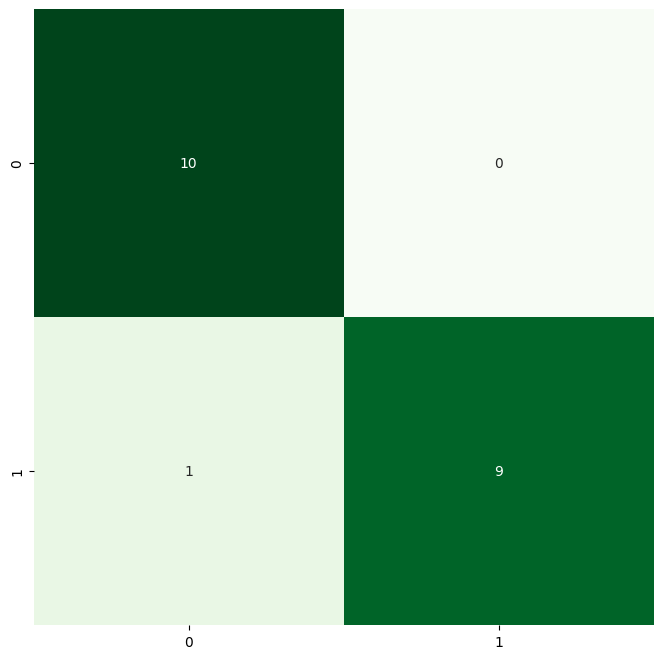

In [19]:
plt.figure(figsize = (8,8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, cmap = "Greens", annot = True, fmt = ".2g", cbar = False)
plt.show()

In [20]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      18464     
                                                                 
 max_pooling2d (MaxPooling2  (None, 62, 62, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 29, 29, 16)        0         
 g2D)                                                   

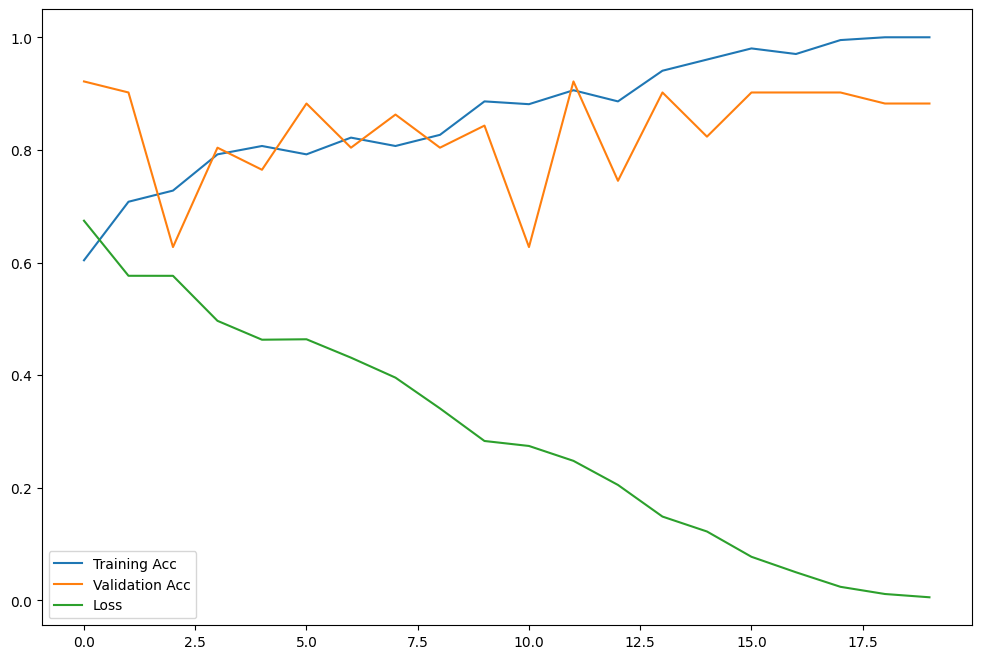

In [22]:
histdf = pd.DataFrame(history.history)

plt.figure(figsize=(12,8))
plt.plot(histdf['accuracy'], label='Training Acc')
plt.plot(histdf['val_accuracy'], label='Validation Acc')
plt.plot(histdf['loss'], label='Loss')
plt.legend()
plt.show()

In [23]:
def preprocess_uploaded_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=-1)  # Add a channel dimension
    return img

In [31]:
uploaded_image_path = "/content/21 no.jpg"
uploaded_image = preprocess_uploaded_image(uploaded_image_path)

In [32]:
prediction = model.predict(np.array([uploaded_image]))
print(prediction)
if prediction[0][0] > 0.5:
    print("Brain tumor is present.")
else:
    print("No brain tumor detected.")

1/1 [==============================] - 0s 26ms/step
[[0.00179238]]
No brain tumor detected.
